# Object Detection with OpenCV and Python
In this section, we will cover the Corner Detection using Harris Corner Detection and Shi-Tomasi Detection

Corner : It is a point whose local neigbourhood stands in two dominant and different edge directions. Simply it is a junction of 2 edges where edge is a sudden change in image brightness.

Basically here in this section we will discuss 2 types of corner detection algorithms:

Harris Corner Detection :
Published by Chris Harris and Mike Stephens in 1988.
Corners can be detected by looking for significant change in all directions

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

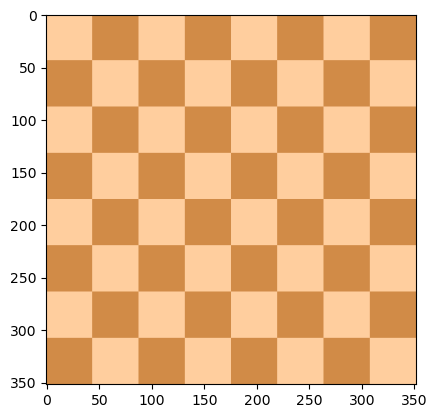

In [2]:
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

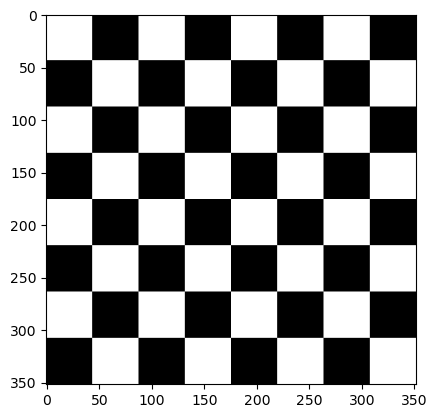

In [3]:
#Load this in gray scale

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

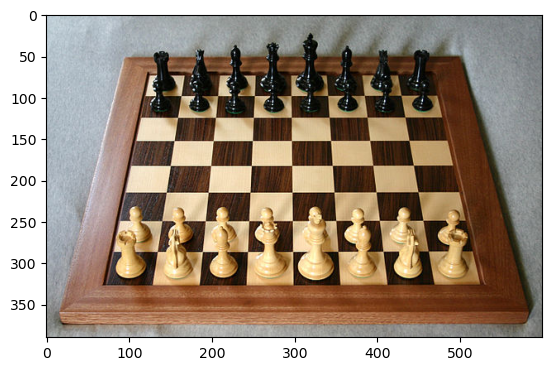

In [4]:
# Uploading real chessboard image

real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

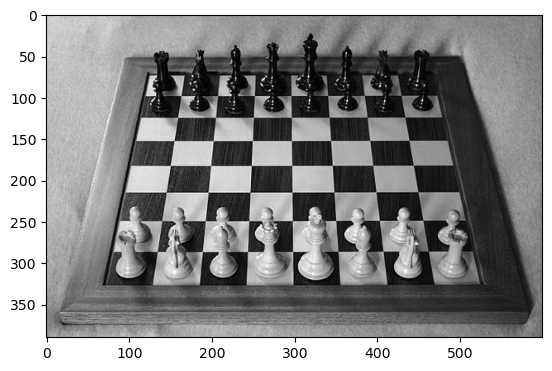

In [5]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [6]:
gray = np.float32(gray_flat_chess)
dst = cv2.cornerHarris( src=gray,blockSize=2,ksize=3,k=0.04)

'''
blockSize is the neighbourhood size (corner eigenvalues and vectors)
ksize is the aperture parameter (lernel size) for Sobel operator
k = Harris detector free parameter in formula above
'''

dst = cv2.dilate(dst,None)
#dilate is morphological operator used in erosion

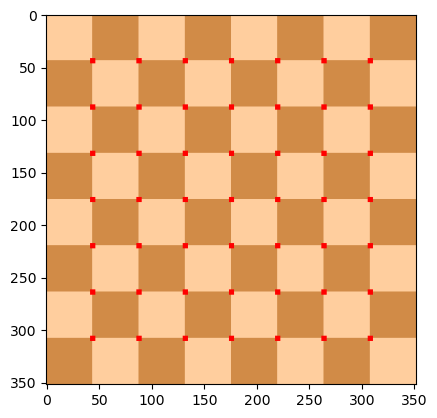

In [7]:
# whatever the result of dst if greater than 1% of max value will be assigned to color red

flat_chess[dst>0.01*dst.max()] = [255,0,0]

plt.imshow(flat_chess) #corners are detected

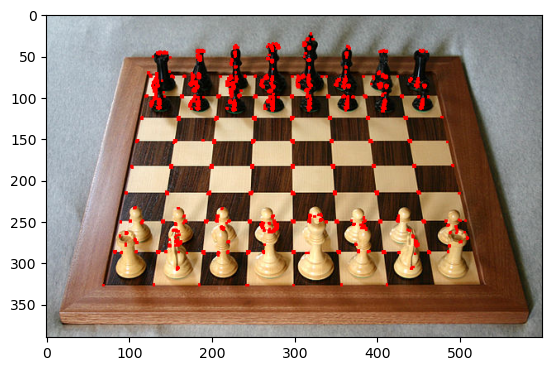

In [8]:
# Now lets try on actual real chessboard

gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)

real_chess[dst>0.01*dst.max()] = [255,0,0]

plt.imshow(real_chess) #corners are detected

In real chess board with pieces, corner are also detected for not only chess board but also for chess pieces

## Shi-Tomasi Corner Detection

In [9]:
#Draw images again as there has been certain modifications using Harris corner detector

flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

In [10]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)

'''
 - max number of corners (best)
 - quality level parameter = paremater*best quality measure for measure = eigenvalue
 - 10 min distance
'''

'\n - max number of corners (best)\n - quality level parameter = paremater*best quality measure for measure = eigenvalue\n - 10 min distance\n'

C:\Users\atoth\AppData\Local\Temp\ipykernel_34308\3528995849.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


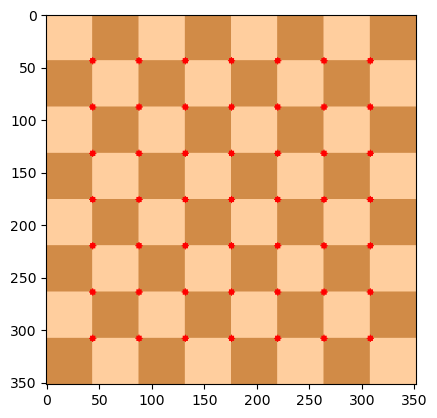

In [11]:
corners = np.int0(corners)

for i in corners:
  x,y = i.ravel()
  cv2.circle(flat_chess,(x,y),3,
             (255,0,0),-1)
plt.imshow(flat_chess)

C:\Users\atoth\AppData\Local\Temp\ipykernel_34308\425543436.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


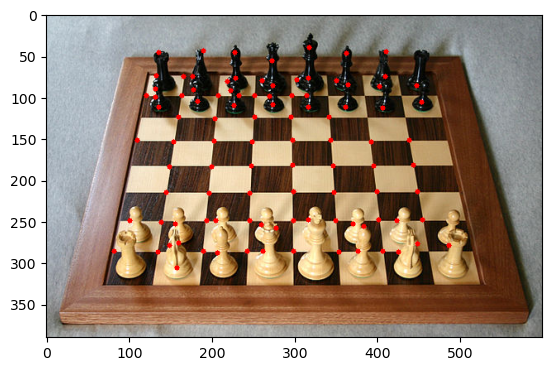

In [12]:
#Real Chess Board
corners = cv2.goodFeaturesToTrack(gray_real_chess,100,0.01,10)

corners = np.int0(corners)

for i in corners:
  x,y = i.ravel()
  cv2.circle(real_chess,(x,y),3,
             (255,0,0),-1)
plt.imshow(real_chess)

Using Shi-Tomasi detection, we can control the number of maximum number of bext corner based on their quality measures

# Object Detection with OpenCV and Python
In this section, we will cover the Feature Matching :

Extracts defining key features from an input image (using ideas from corner, edge, and contour detection)
Then uses a distance calculation to find all the matches in the secondary image.
This means we don't need to have exact copy of the target image.
3 methods :
Brute-Force Matching with ORB Descriptors
Brute-Force Matching with SIFT Descriptors and Ratio Test
FLANN based Matcher
Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.

For BF matcher, first we have to create the BFMatcher object using cv2.BFMatcher(). It takes two optional params.

First one is normType. It specifies the distance measurement to be used. By default, it is cv2.NORM_L2. It is good for SIFT, SURF etc (cv2.NORM_L1 is also there).
For binary string based descriptors like ORB, BRIEF, BRISK etc, cv2.NORM_HAMMING should be used, which used Hamming distance as measurement. If ORB is using VTA_K == 3 or 4, cv2.NORM_HAMMING2 should be used.

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

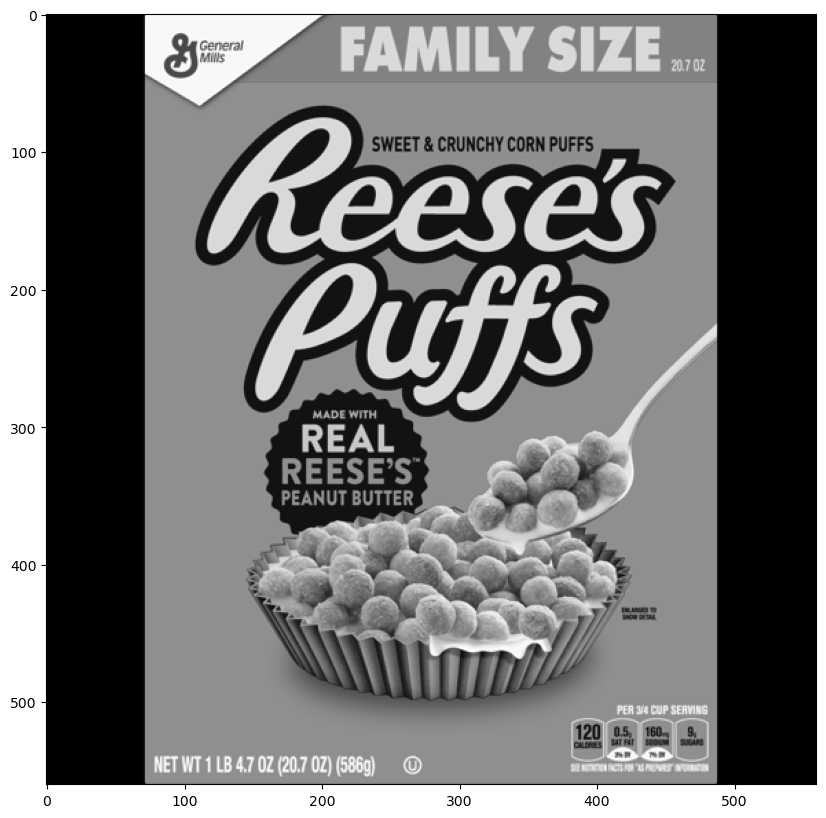

In [14]:
reeses = cv2.imread('reeses_puffs.png',0)
display(reeses)

It is important to note differences between real image from many cereals and reese puffs family size package.

In real image, family size is not written and packaging is bit different than reese puffs image.

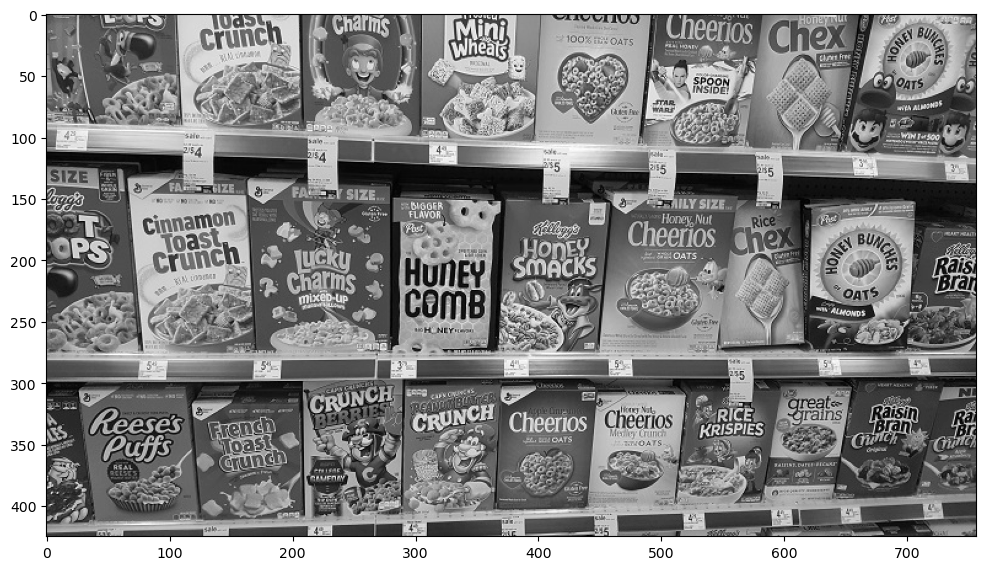

In [15]:
cereals = cv2.imread('many_cereals.jpg',0)
display(cereals)

## Brute-Force Matching with ORB Descriptors

In [16]:
#create a detector

orb = cv2.ORB_create()

#Ran ORB on images

kp1,des1 = orb.detectAndCompute(reeses,mask=None) #key points and descriptors
kp2,des2 = orb.detectAndCompute(cereals,mask=None)

In [17]:
#Brute Force Matching, where the maximum matching is taking place.

bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2) #objects

In [18]:
matches = sorted(matches,key=lambda x:x.distance)

'''
single_match = matches[0]
single_match.distance
76.0
# So less the distance better the MATCH
'''

'\nsingle_match = matches[0]\nsingle_match.distance\n76.0\n# So less the distance better the MATCH\n'

In [19]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2) #for first sorted 25 matches

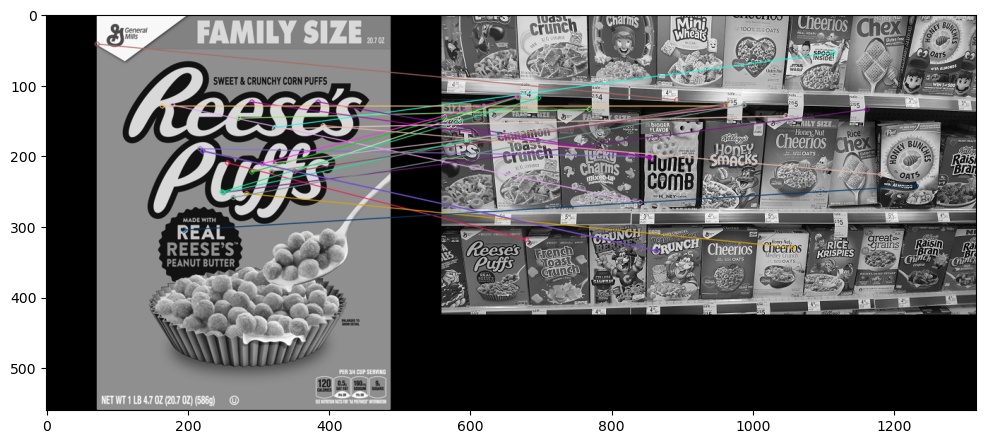

In [20]:
display(reeses_matches)

If there are a lot of similar images nearby, Brute-Force Matching with ORB Descriptors DOESN'T work well and there are also couple of problems in our image as well:

1) Family Size written on Reese puff not written on another image
2) Another image is bit distorted and not much similar to original image

## Brute-Force Matching with SIFT Descriptors and Ratio Test
1) SIFT - scale invariant feature transform
2) As images are not of same size, sometimes detection is not done properly so SIFT is sused to overlook this issue.

In [21]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [22]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2) #top 2 matches

#Finds the k best matches for each descriptor from a query set.

In [23]:
#Now apply Ratio test , if ratio is near to 1 , it is good match as theya re close in distance

good =[]
# LESS DISTANCE -- BETTER THE MATCH
for match1,match2 in matches:
  #if MATCH1 DISTANCE is < 75% of MATCH 2 THEN IT IS A GOOD MATCH
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

In [24]:
print('Length of total matches: ',len(matches))
print('Length of good matches: ',len(good))

Length of total matches:  1501
Length of good matches:  79


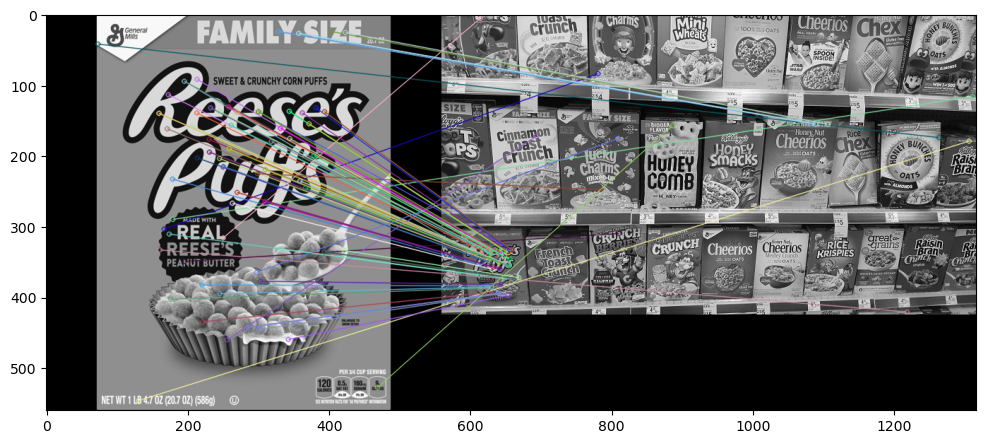

In [25]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

Now we can see the most of matches are very well matched from cereals image. Although the family size wriiten is well amtched with other packaging as well.

## FLANN based Matcher
1) Fast Library for Approx Nearest Neighbours
2) It is fast than SIFT with Ratio ratio but doesn't find best matches but general good matches

In [26]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [27]:
#FLANN parameters - to inc/dec precision or quality of the matches that comes with cost of slowing down the algorithm

flann_index_KDtree = 0
index_params = dict(algorithm=flann_index_KDtree,trees=5)
search_params = dict(checks=50)

In [28]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good =[]
# LESS DISTANCE -- BETTER THE MATCH
for match1,match2 in matches:
  #if MATCH1 DISTANCE is < 75% of MATCH 2 THEN IT IS A GOOD MATCH
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

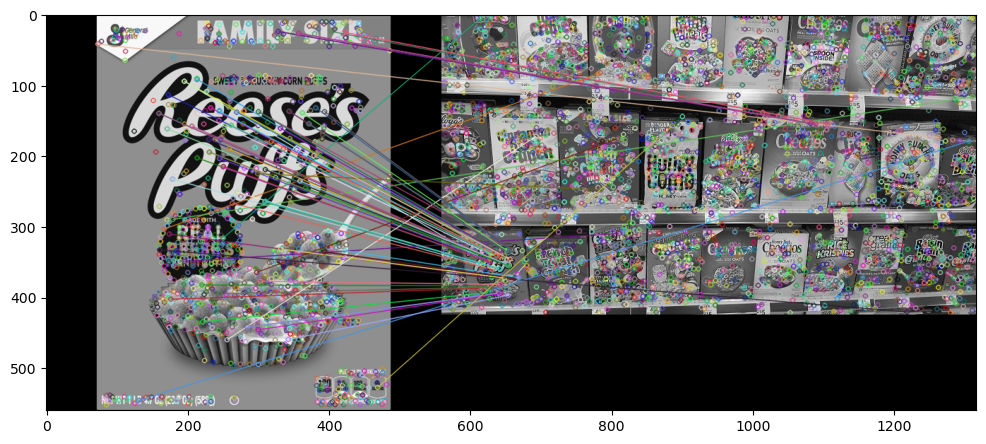

In [29]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)
display(flann_matches)

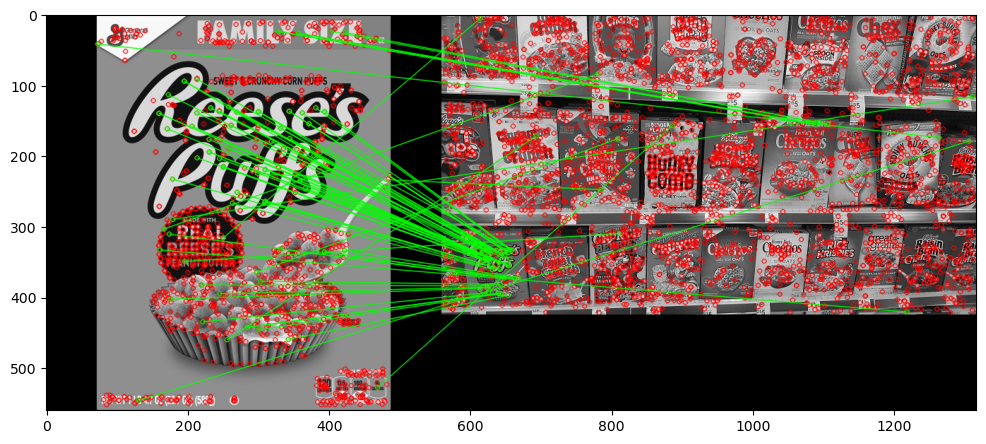

In [30]:
#with mask

sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

flann_index_KDtree = 0
index_params = dict(algorithm=flann_index_KDtree,trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

#masking
matchesMask = [[0,0] for i in range(len(matches))] #bunch of zeros pure black and some will be on

# LESS DISTANCE -- BETTER THE MATCH
for i,(match1,match2) in enumerate(matches):
  #if MATCH1 DISTANCE is < 75% of MATCH 2 THEN IT IS A GOOD MATCH
  if match1.distance < 0.75*match2.distance:
    matchesMask[i] = [1,0]

draw_params = dict(matchColor=(0,255,0),
                   singlePointColor=(255,0,0),
                   matchesMask=matchesMask,
                   flags=0) #by changing flags = 2 we can remove the red dots

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)